In [1]:
#EDA is all about understanding data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("C:/Users/anjan/datasets/Stroke_Prediction_Indians.csv")

In [ ]:
#read data

In [5]:
df.shape

(172000, 22)

In [ ]:
# the data set has 22 cols and 172000 rows

In [6]:
df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78,Female,0,0,1,Private,Rural,267.30,36.2,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,2,60,Female,0,0,0,Private,Rural,207.24,19.8,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,3,69,Male,0,0,0,Private,Urban,161.30,34.5,...,Mixed,1,0,3,0,Secondary,High,63,North,1
3,4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,5,30,Female,0,0,1,Government,Urban,116.57,31.3,...,Mixed,0,1,9,0,Secondary,High,99,West,0


In [10]:
df.columns

Index(['ID', 'Age', 'Gender', 'Hypertension', 'Heart Disease', 'Ever Married',
       'Work Type', 'Residence Type', 'Average Glucose Level', 'BMI',
       'Smoking Status', 'Physical Activity', 'Dietary Habits',
       'Alcohol Consumption', 'Chronic Stress', 'Sleep Hours',
       'Family History of Stroke', 'Education Level', 'Income Level',
       'Stroke Risk Score', 'Region', 'Stroke Occurrence'],
      dtype='object')

In [43]:
df['Stroke Occurrence'].value_counts()

Stroke Occurrence
0    154904
1     17096
Name: count, dtype: int64

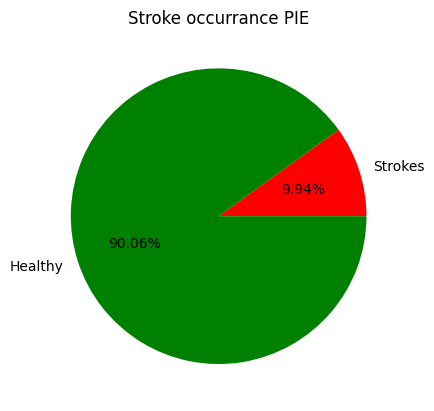

In [12]:
# out of 172000 people 17096 are Stroke +ve almost 10%
plt.pie([17096, 154904], labels=['Strokes', 'Healthy'], colors=['red', 'green'],autopct='%1.2f%%')
plt.title('Stroke occurrance PIE')
plt.show()

In [ ]:
# Continuous Attributes: ID, Age, Average Glucose Level, BMI, Sleep Hours, and Stroke Risk Score.
# Binary Attributes: Gender, Hypertension, Heart Disease, Ever Married, Smoking Status, Physical Activity, Alcohol Consumption, Chronic Stress, and Family History of Strokes.
# Categorical Attributes: Work Type, Residence Type, Dietary Habits, Education Level, Income Level, and Region.

# Stroke Occurance is binary and Target Attribute

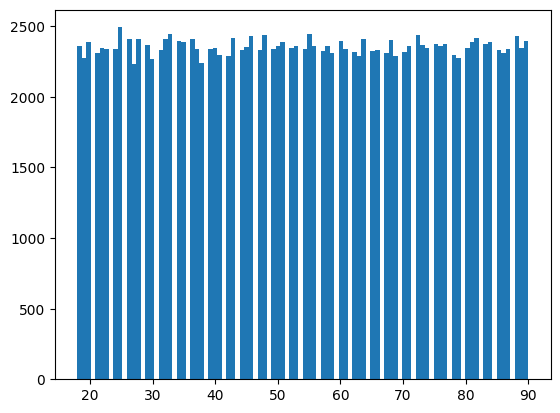

In [16]:
plt.hist(df.Age,bins=100)
plt.show()

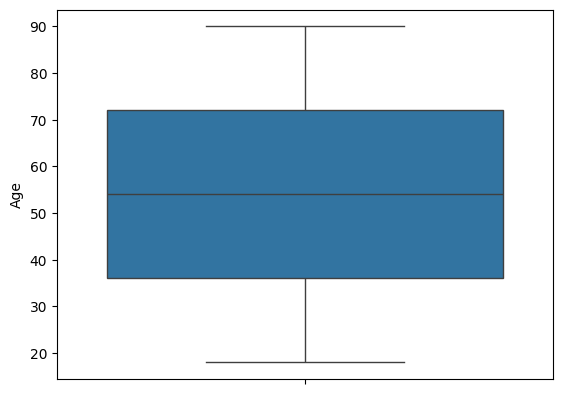

In [22]:
sns.boxplot(df.Age)
plt.show()

In [ ]:
#We can clearly see median is almost middle which shows the equal data collection and no outliers

In [40]:
# From the histogram we can clearly understanding data is collected over all aged groups

In [19]:
aged=df[df['Stroke Occurrence']==1].Age

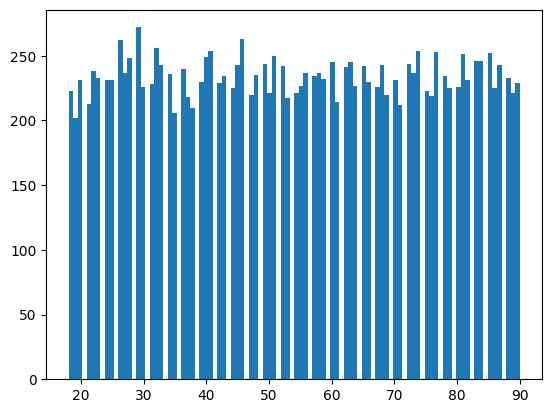

In [20]:
plt.hist(aged,bins=100)
plt.show()

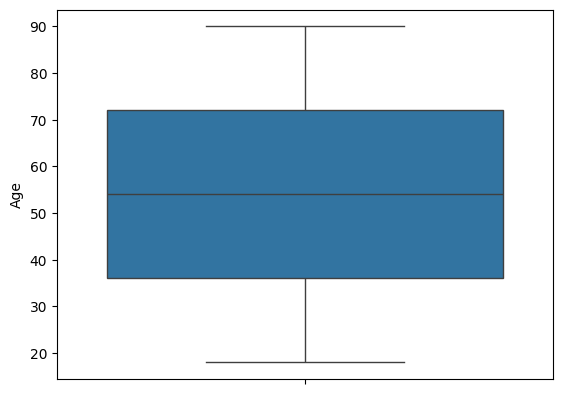

In [23]:
# Even the Stoke Occurrances are not perticular in a age group
sns.boxplot(aged)
plt.show()

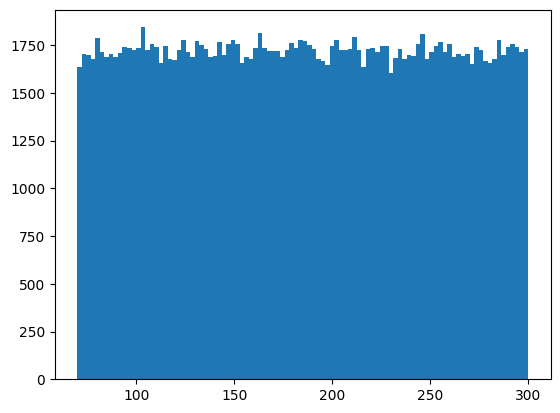

In [24]:
plt.hist(df['Average Glucose Level'],bins=100)
plt.show()

<Axes: ylabel='Average Glucose Level'>

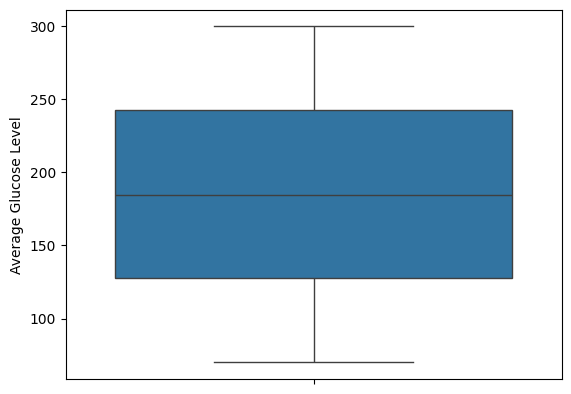

In [25]:
sns.boxplot(df['Average Glucose Level'])

In [29]:
glucose=df[df['Stroke Occurrence']==1]['Average Glucose Level']

<Axes: ylabel='Average Glucose Level'>

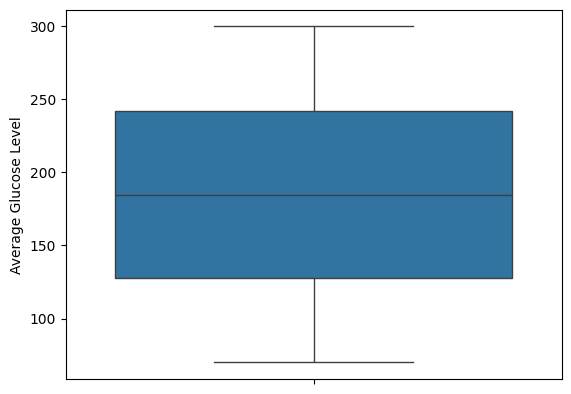

In [30]:
sns.boxplot(glucose)

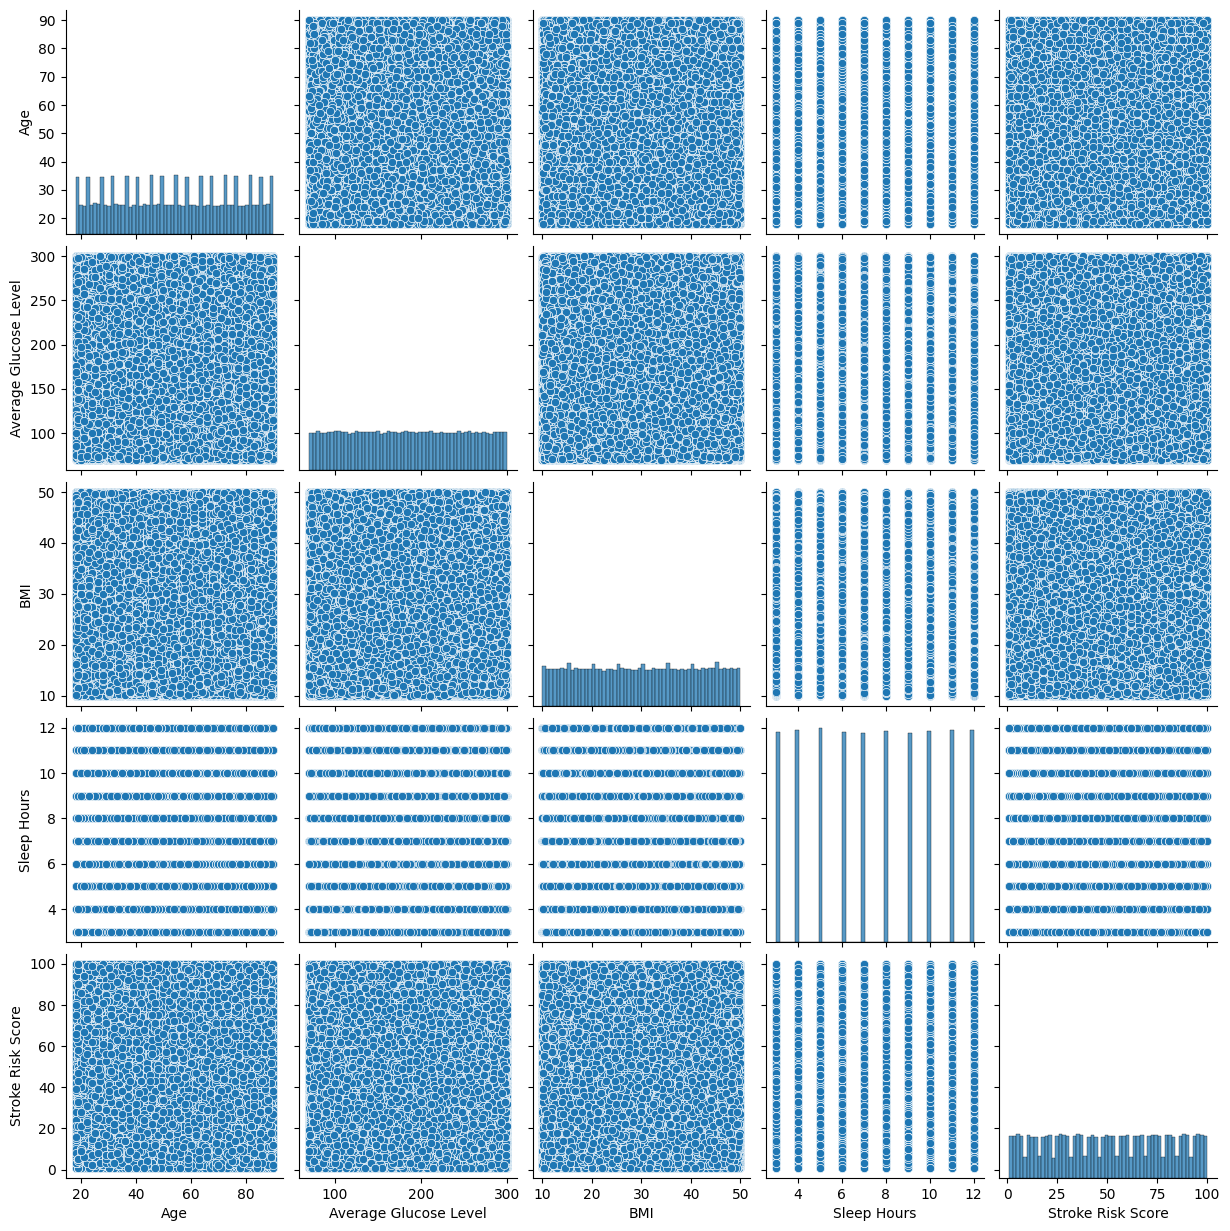

In [39]:
num_df=df[['Age', 'Average Glucose Level', 'BMI', 'Sleep Hours', 'Stroke Risk Score']]
sns.pairplot(num_df)

In [ ]:
# from the left diagonal plotings we can see the histograms showing us Data is equally collected

In [17]:
pos_df=df[df['Stroke Occurrence']==1]

In [9]:
np.corrcoef(df['Age'],df['Stroke Risk Score'])

array([[ 1.0000000e+00, -5.6314844e-04],
       [-5.6314844e-04,  1.0000000e+00]])

<BarContainer object of 5 artists>

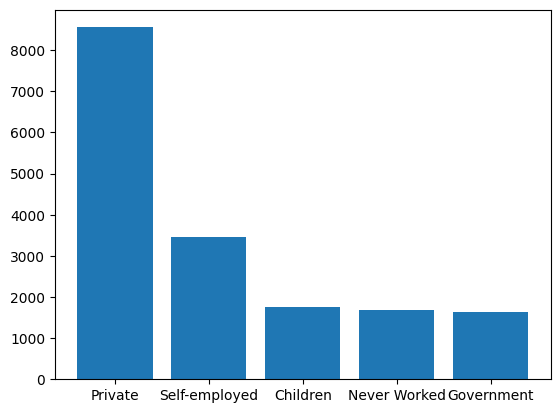

In [23]:
# very low correlation hance age is nothing to do with stroke risk score
worktypes=pos_df.value_counts(df['Work Type'])
plt.bar(worktypes.index,worktypes.values)

In [19]:
pd.value_counts(pos_df['Work Type'])

C:\Users\anjan\AppData\Local\Temp\ipykernel_20732\1624687815.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pos_df['Work Type'])


Work Type
Private          8558
Self-employed    3459
Children         1750
Never Worked     1691
Government       1638
Name: count, dtype: int64

In [16]:
# Private employees has higher chance of getting stroke
print(f"Probability of Private employees prone to heart strokes is {len(pos_df[pos_df['Work Type'] == 'Private']) / len(pos_df)}")

Probability of Private employees prone to heart strokes is 0.5005849321478708


In [17]:
# almost half of the heart stroke victims are Private employees
pd.value_counts(pos_df['Residence Type'])

C:\Users\anjan\AppData\Local\Temp\ipykernel_19824\1349233592.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pos_df['Residence Type'])


Residence Type
Rural    8612
Urban    8484
Name: count, dtype: int64

In [19]:
# Residence has nothing to do with heart stroke
pd.value_counts(pos_df['Dietary Habits'])

C:\Users\anjan\AppData\Local\Temp\ipykernel_19824\3381150103.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pos_df['Dietary Habits'])


Dietary Habits
Non-Vegetarian    8574
Vegetarian        5096
Mixed             3426
Name: count, dtype: int64

In [54]:
# Non vegetarians has almost 50% of heart stroke victims
smoke=pd.value_counts(pos_df['Smoking Status'])
smoke

C:\Users\anjan\AppData\Local\Temp\ipykernel_20732\2419266354.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  smoke=pd.value_counts(pos_df['Smoking Status'])


Smoking Status
Never smoked       10288
Formerly smoked     3477
Unknown             1677
Smokes              1654
Name: count, dtype: int64

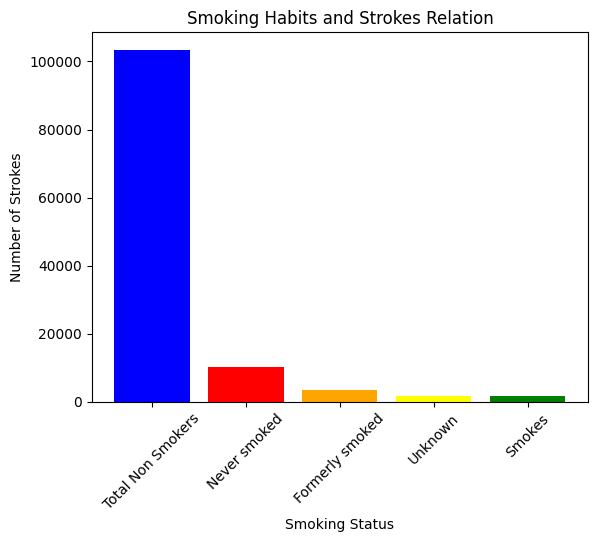

In [55]:
nonsmokers=df['Smoking Status'].value_counts().get('Never smoked',0)
plt.bar(['Total Non Smokers']+list(smoke.index),[nonsmokers]+list(smoke.values),color=['blue','Red','Orange','Yellow','Green'])
plt.ylabel('Number of Strokes')
plt.xlabel('Smoking Status')
plt.title('Smoking Habits and Strokes Relation')
plt.xticks(rotation=45)
plt.show()


In [47]:
# from diagram we can clearly see in data set there ate almost 1lakh of non smokers which leads more strokes in non smokres that doesnt explicitly mean
# that non smokers are highly likly to get a stroke

'Never smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNever smokedNev

In [24]:
#Non smokers has higher risk of getting head ach
phy_ac=pd.value_counts(pos_df['Physical Activity'])
phy_ac

C:\Users\anjan\AppData\Local\Temp\ipykernel_20732\4188156295.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  phy_ac=pd.value_counts(pos_df['Physical Activity'])


Physical Activity
Sedentary    6912
Light        5020
Moderate     3472
Active       1692
Name: count, dtype: int64

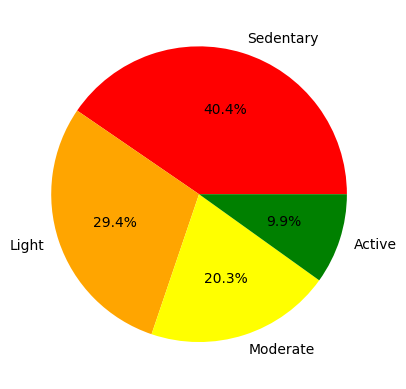

In [35]:
plt.pie(phy_ac.values,labels=phy_ac.index,colors=['Red','Orange','Yellow','Green'],autopct='%1.1f%%')
plt.show()

In [29]:
# senentray and light physical activity are major reasons of strokes
pd.value_counts(pos_df['Sleep Hours'])

C:\Users\anjan\AppData\Local\Temp\ipykernel_19824\2373756896.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pos_df['Sleep Hours'])


Sleep Hours
10    1772
6     1761
5     1752
12    1728
8     1703
11    1700
4     1690
7     1678
3     1662
9     1650
Name: count, dtype: int64

In [31]:
pos_df['Stroke Risk Score'].mean()

50.64915769770707

In [33]:
df[df['Stroke Occurrence']==0]['Stroke Risk Score'].mean()

50.61575556473687

In [34]:
# Both postive and negitive class labels has almost same average Stroke risk score
pd.value_counts(pos_df['Alcohol Consumption'])

C:\Users\anjan\AppData\Local\Temp\ipykernel_19824\1845836138.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pos_df['Alcohol Consumption'])


Alcohol Consumption
0    13577
1     3519
Name: count, dtype: int64

In [ ]:
# physical activity and dietray habits are crutial in the occurannce of heart stroke

In [45]:
filtered=df[(((df['Physical Activity']=='Sedentary') | (df['Physical Activity']=='Light')) & (df['Work Type']=='Private') )]

In [50]:
filtered['Stroke Occurrence'].sum()

6015

In [ ]:
# out of 17000 heart stroke victims Private job holders and people with low physical activity are 6000

In [55]:
pd.value_counts(filtered[filtered['Stroke Occurrence']==1]['Dietary Habits'])

C:\Users\anjan\AppData\Local\Temp\ipykernel_19824\2244047067.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(filtered[filtered['Stroke Occurrence']==1]['Dietary Habits'])


Dietary Habits
Non-Vegetarian    3023
Vegetarian        1783
Mixed             1209
Name: count, dtype: int64

In [ ]:
# out of 6000 heart stroke in filtered data 3023 are Non-Vegetarians 

In [ ]:
# After EDA we have the following conclusions

In [ ]:
#being aged doesn't mean that one has higher changes of getting strokes
#Smokings and Alcohol Consumption are really bad but doesn't mostly contribute to strokes as per dataset

In [ ]:
# Private employees has heigher chance of geting strokes
# Non vegetarians are higher probability of getting strokes
# Being not involved in any Physical activity is the main culprit of strokes